In [1]:
import pandas as pd
import numpy as np

# =========================
# 1️⃣ 데이터 로드
# =========================
csv_path = "new_flight_data.csv"
df = pd.read_csv(csv_path)

print("✅ CSV 로드 완료")
print("전체 행 수:", len(df))

✅ CSV 로드 완료
전체 행 수: 5744619


In [2]:
# =========================
# 2️⃣ 상태 컬럼 유니크 + 개수 확인
# =========================

# 컬럼 존재 여부 체크
if "상태" not in df.columns:
    print("❌ '상태' 컬럼이 없습니다. 현재 컬럼 목록:")
    print(df.columns.tolist())
else:
    print("\n✅ 상태 컬럼 유니크 값 개수:", df["상태"].nunique(dropna=False))

    # 값별 개수 (NaN 포함)
    status_counts = df["상태"].value_counts(dropna=False)
    print("\n📊 상태 값별 개수 (NaN 포함)")
    display(status_counts)

    # 비율까지 같이 보고 싶으면
    status_ratio = (status_counts / len(df)).rename("ratio")
    status_summary = pd.concat([status_counts.rename("count"), status_ratio], axis=1)
    print("\n📊 상태 값별 개수 + 비율")
    display(status_summary)



✅ 상태 컬럼 유니크 값 개수: 5

📊 상태 값별 개수 (NaN 포함)


정상운항    4844631
지연       841406
취소        37690
NaN       19806
회항         1086
Name: 상태, dtype: int64


📊 상태 값별 개수 + 비율


,count,ratio
정상운항,4844631,0.843334
지연,841406,0.146469
취소,37690,0.006561
NaN,19806,0.003448
회항,1086,0.000189


In [3]:

# 일자 컬럼을 datetime으로 변환
df["일자_dt"] = pd.to_datetime(
    df["일자"].astype(str),
    format="%Y%m%d",
    errors="coerce"
)

print("📅 flight 데이터 날짜 범위")
print("시작일:", df["일자_dt"].min())
print("종료일:", df["일자_dt"].max())

print("\n전체 일수:",
      (df["일자_dt"].max() - df["일자_dt"].min()).days + 1)

📅 flight 데이터 날짜 범위
시작일: 2018-01-01 00:00:00
종료일: 2025-12-31 00:00:00

전체 일수: 2922


In [4]:
# =========================
# 2️⃣ 항공사별 비행 횟수 집계
# =========================
airline_counts = (
    df["항공사"]
    .value_counts(dropna=False)
    .reset_index()
)
airline_counts.columns = ["항공사", "total_flights"]

print("\n✈️ 항공사별 비행 횟수")
print(airline_counts.sort_values("total_flights"))


✈️ 항공사별 비행 횟수
           항공사  total_flights
175  카고룩스 이탈리아              1
170    카타르 아미리              1
171   아시아퍼시픽항공              1
174     비스타젯항공              1
173     천진에어카고              1
..         ...            ...
4        티웨이항공         558157
3          진에어         612568
2         제주항공         742622
1       아시아나항공         816757
0         대한항공        1193584

[176 rows x 2 columns]


In [5]:
# =========================
# 3️⃣ 항공사 24회 이상만 선택
# =========================
airline_counts_24 = airline_counts[
    airline_counts["total_flights"] >= 24
]

valid_airlines = airline_counts_24["항공사"].tolist()

print("\n✅ 사용할 항공사 수:", len(valid_airlines))
print(valid_airlines)


✅ 사용할 항공사 수: 140
['대한항공', '아시아나항공', '제주항공', '진에어', '티웨이항공', '에어부산', '이스타항공', '에어서울', '중국동방항공', '비엣젯항공', '중국남방항공', '중국국제항공', '하이에어', '에어로케이항공', '베트남항공', '산동항공', '춘추항공', '피치항공', '델타항공', '중화항공', '필리핀항공', '싱가폴항공', '캐세이퍼시픽항공', '타이항공', '홍콩익스프레스', '장영항공(長榮)', '일본항공', nan, '필리핀에어아시아', '세부퍼시픽항공', '전일본항공', '에어캐나다', '상해항공', '에어프레미아', '타이거 에어 타이완(스마트캣)', '에어아시아 엑스', '유나이티드항공', '몽골항공', '독일항공', '코리아익스프레스', '심천항공', '타이에어아시아엑스', '중국길상항공', '네덜란드항공', '터키항공', '오로라항공', '에티하드', '에티오피안항공', '에어마카오', '가루다인도네시아', '카타르항공', '프랑스항공', '에미레이트항공', '아메리칸항공', '스쿠트타이거', '말레이시아항공', '샤먼항공', '홍콩항공', '팬퍼시픽항공', '폴란드항공', '에어포항', '핀란드항공', '에어아스타나항공', '라오항공', '우즈베키스탄항공', '청도항공', '에어필립', '천진에어라인', '시베리아 항공', '하와이안항공', '집에어도쿄', '스카이앙코르항공', '사천항공', '아에로멕시코', '에어인디아', '룽에어', '드래곤에어', '젯스타 에어웨이즈', '뱀부항공', '러시아항공', '미얀마국제항공', '말린도항공', '브루나이항공', '영국항공', '대만구항공', '파라타항공', '에어재팬', '에어아시아버하드', '아틀라스화물항공', '젯스타퍼시픽항공', '에어로 몽골리아', '북경수도항공', '콴타스항공', '알이탈리아항공', '스리랑칸항공', '에어뉴질랜드', '체코항공', '사우디아라비아 항공', '야쿠티아항공', '팔익스프레스', '유니항공(立榮)', '오케이

In [6]:
# =========================
# 4️⃣ 항공사 기준 필터링
# =========================
df_filtered = df[df["항공사"].isin(valid_airlines)].reset_index(drop=True)

print("항공사 필터링 후 행 수:", len(df_filtered))

항공사 필터링 후 행 수: 5744412


In [7]:
# =========================
# 5️⃣ 출발지 15개만 사용
# =========================
valid_departures = [
    "인천", "김포", "청주", "양양", "군산",
    "원주", "김해", "제주", "대구", "광주",
    "여수", "울산", "포항경주", "사천", "무안"
]

df_filtered = df_filtered[
    df_filtered["출발지"].isin(valid_departures)
].reset_index(drop=True)

print("출발지 15개 필터링 후 행 수:", len(df_filtered))

출발지 15개 필터링 후 행 수: 4468210


In [8]:
# =========================
# 6️⃣ 출발지 검증
# =========================
print("\n출발지 유니크 개수:", df_filtered["출발지"].nunique())
print(sorted(df_filtered["출발지"].unique()))


출발지 유니크 개수: 15
['광주', '군산', '김포', '김해', '대구', '무안', '사천', '양양', '여수', '울산', '원주', '인천', '제주', '청주', '포항경주']


In [9]:
# =========================
# ⏱ 출발시간 결측 제거 (국내 출발 기준)
# =========================
print("출발시간 결측 제거 전:", len(df_filtered))

df_filtered = df_filtered[df_filtered["출발시간"].notna()].reset_index(drop=True)

print("출발시간 결측 제거 후:", len(df_filtered))


출발시간 결측 제거 전: 4468210
출발시간 결측 제거 후: 2843943


In [10]:
# =========================
# 2️⃣ 상태 컬럼 유니크 + 개수 확인
# =========================

# 컬럼 존재 여부 체크
if "상태" not in df.columns:
    print("❌ '상태' 컬럼이 없습니다. 현재 컬럼 목록:")
    print(df_filtered.columns.tolist())
else:
    print("\n✅ 상태 컬럼 유니크 값 개수:", df["상태"].nunique(dropna=False))

    # 값별 개수 (NaN 포함)
    status_counts = df_filtered["상태"].value_counts(dropna=False)
    print("\n📊 상태 값별 개수 (NaN 포함)")
    display(status_counts)

    # 비율까지 같이 보고 싶으면
    status_ratio = (status_counts / len(df)).rename("ratio")
    status_summary = pd.concat([status_counts.rename("count"), status_ratio], axis=1)
    print("\n📊 상태 값별 개수 + 비율")
    display(status_summary)



✅ 상태 컬럼 유니크 값 개수: 5

📊 상태 값별 개수 (NaN 포함)


정상운항    2360833
지연       481449
회항          859
취소          579
NaN         223
Name: 상태, dtype: int64


📊 상태 값별 개수 + 비율


,count,ratio
정상운항,2360833,0.410964
지연,481449,0.083809
회항,859,0.000150
취소,579,0.000101
NaN,223,0.000039


In [11]:
# =========================
# 🔍 컬럼별 결측치 현황 (EDA)
# =========================

missing_summary = (
    df_filtered
    .isna()
    .sum()
    .reset_index()
)

missing_summary.columns = ["column", "missing_cnt"]
missing_summary["missing_ratio"] = missing_summary["missing_cnt"] / len(df_filtered)
missing_summary["dtype"] = missing_summary["column"].map(
    lambda c: df_filtered[c].dtype
)

# 결측치 있는 컬럼만 보기
missing_summary = missing_summary[missing_summary["missing_cnt"] > 0]

# 결측치 많은 순서로 정렬
missing_summary = missing_summary.sort_values(
    "missing_ratio",
    ascending=False
)

print("📊 컬럼별 결측치 현황")
display(missing_summary)


📊 컬럼별 결측치 현황


,column,missing_cnt,missing_ratio,dtype
14,도착시간,2843943,1.000000e+00,float64
12,지연원인,2391614,8.409500e-01,object
8,예상시간,22395,7.874630e-03,float64
3,항공사,6681,2.349203e-03,object
5,도착지,347,1.220137e-04,object
11,상태,223,7.841226e-05,object
7,계획시간,1,3.516245e-07,float64


In [12]:
# =========================
# 출발 datetime 생성
# =========================

df_filtered["출발시간_clean"] = (
    df_filtered["출발시간"]
    .astype(int)
    .astype(str)
    .str.zfill(4)
)

df_filtered["departure_datetime"] = pd.to_datetime(
    df_filtered["일자"].astype(str) + df_filtered["출발시간_clean"],
    format="%Y%m%d%H%M",
    errors="coerce"
)

print("departure_datetime NaT 개수:", df_filtered["departure_datetime"].isna().sum())


departure_datetime NaT 개수: 0


In [13]:
# =========================
# 시간 파생 변수
# =========================
df_filtered["dep_hour"] = df_filtered["departure_datetime"].dt.hour
df_filtered["dep_weekday"] = df_filtered["departure_datetime"].dt.weekday
df_filtered["is_weekend"] = df_filtered["dep_weekday"].isin([5, 6]).astype(int)


In [14]:
# =========================
# 7️⃣ 타겟 변수 생성 (is_delay)
# =========================
def make_delay_label(x):
    if pd.isna(x):
        return 0
    if any(k in x for k in ["지연", "취소", "회항"]):
        return 1
    return 0

df_filtered["is_delay"] = df_filtered["상태"].apply(make_delay_label)

print("\n⏱ 지연 분포")
print(df_filtered["is_delay"].value_counts())


⏱ 지연 분포
0    2361056
1     482887
Name: is_delay, dtype: int64


In [15]:
# =========================
# 🔟 국내 / 국제 구분 (도착지 기준)
# =========================

domestic_airports = set([
    "인천", "김포", "청주", "양양", "군산",
    "원주", "김해", "제주", "대구", "광주",
    "여수", "울산", "포항경주", "사천", "무안"
])

df_filtered["flight_type"] = df_filtered["도착지"].apply(
    lambda x: "국내" if pd.notna(x) and x.strip() in domestic_airports else "국제"
)

print("\n✈️ 국내 / 국제 분포 (도착지 기준)")
print(df_filtered["flight_type"].value_counts())



✈️ 국내 / 국제 분포 (도착지 기준)
국내    1577185
국제    1266758
Name: flight_type, dtype: int64


In [16]:
# =========================
# 8️⃣ 샘플 1000개 (EDA / 테스트용)
# =========================
df_sample = df_filtered.sample(
    n=min(1000, len(df_filtered)),
    random_state=42
)

df_sample.to_excel(
    "new_flight_data_sample_1000.xlsx",
    index=False
)

print("✅ 샘플 엑셀 저장 완료 (국내/국제 포함)")

✅ 샘플 엑셀 저장 완료 (국내/국제 포함)


In [17]:
# =========================
# 9️⃣ 최종 분석용 CSV 저장
# =========================
df_filtered.to_csv(
    "new_flight_analysis_summary.csv",
    index=False,
    encoding="utf-8-sig"
)

print("✅ 최종 분석용 CSV 저장 완료 (국내/국제 포함)")

✅ 최종 분석용 CSV 저장 완료 (국내/국제 포함)


# 📊 시각화(추가)

아래 셀은 **기존 전처리 코드에는 손대지 않고**, 전처리 결과를 빠르게 점검하기 위한 **표/그래프**만 생성합니다.  
(실행은 선택사항이며, 필요할 때만 실행하세요.)


In [19]:
# ===============================
# ✅ 한글 폰트 깨짐 방지 설정
# ===============================
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm

system = platform.system()

if system == "Windows":
    # Windows (대부분 Malgun Gothic 사용)
    plt.rcParams["font.family"] = "Malgun Gothic"

elif system == "Darwin":
    # macOS
    plt.rcParams["font.family"] = "AppleGothic"

else:
    # Linux (Colab / 서버)
    # 나눔고딕이 없을 경우 대비
    try:
        plt.rcParams["font.family"] = "NanumGothic"
    except:
        plt.rcParams["font.family"] = "DejaVu Sans"

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

print(f"✅ 한글 폰트 설정 완료 ({system})")


✅ 한글 폰트 설정 완료 (Windows)


✅ 시각화 대상 DataFrame 선택: df_filtered (shape=(2843943, 24))


,항목,값
0,행 수,2843943.0
1,열 수,24.0
2,중복 행 수,0.0
3,중복 행 비율(%),0.0



🔎 상위 10행 미리보기


,Unnamed: 0,출발/도착,공항명,항공사,편명,도착지,일자,계획시간,예상시간,출발시간,...,도착시간,지연_분,일자_dt,출발시간_clean,departure_datetime,dep_hour,dep_weekday,is_weekend,is_delay,flight_type
0,0,출발,인천,에미레이트항공,EK323,두바이,20180201,5.0,2350.0,27.0,...,NaN,22.0,2018-02-01,0027,2018-02-01 00:27:00,0,3,0,0,국제
1,1,출발,인천,대한항공,KE473,말레,20180201,5.0,2330.0,0.0,...,NaN,-5.0,2018-02-01,0000,2018-02-01 00:00:00,0,3,0,0,국제
2,2,출발,인천,말레이시아항공,MH039D,쿠알라룸푸르,20180201,10.0,2030.0,2049.0,...,NaN,1239.0,2018-02-01,2049,2018-02-01 20:49:00,20,3,0,1,국제
3,3,출발,인천,에티하드,EY873,아부다비,20180201,15.0,15.0,17.0,...,NaN,2.0,2018-02-01,0017,2018-02-01 00:17:00,0,3,0,0,국제
4,4,출발,인천,타이에어아시아엑스,XJ703,돈므앙(방콕),20180201,20.0,20.0,22.0,...,NaN,2.0,2018-02-01,0022,2018-02-01 00:22:00,0,3,0,0,국제
5,5,출발,인천,싱가폴항공,SQ007,싱가포르,20180201,25.0,25.0,29.0,...,NaN,4.0,2018-02-01,0029,2018-02-01 00:29:00,0,3,0,0,국제
6,6,출발,인천,카타르항공,QR859,도하,20180201,30.0,30.0,53.0,...,NaN,23.0,2018-02-01,0053,2018-02-01 00:53:00,0,3,0,0,국제
7,7,출발,인천,터키항공,TK91,아타튀르크,20180201,40.0,40.0,34.0,...,NaN,-6.0,2018-02-01,0034,2018-02-01 00:34:00,0,3,0,0,국제
8,8,출발,인천,네덜란드항공,KL856,암스테르담,20180201,55.0,55.0,141.0,...,NaN,46.0,2018-02-01,0141,2018-02-01 01:41:00,1,3,0,0,국제
9,9,출발,인천,필리핀항공,PR493,클라크,20180201,130.0,205.0,156.0,...,NaN,26.0,2018-02-01,0156,2018-02-01 01:56:00,1,3,0,0,국제



🧾 dtype 요약


,dtype,count
0,object,11
1,int64,5
2,float64,5
3,datetime64[ns],2
4,int32,1



🧩 결측치 요약 (상위 30개 컬럼)


,na_count,na_pct(%)
도착시간,2843943,100.000000
지연원인,2391614,84.095005
예상시간,22395,0.787463
항공사,6681,0.234920
도착지,347,0.012201
상태,223,0.007841
계획시간,1,0.000035
Unnamed: 0,0,0.000000
출발/도착,0,0.000000
공항명,0,0.000000



⏱ is_delay 분포(표)


,count
0,2361056
1,482887


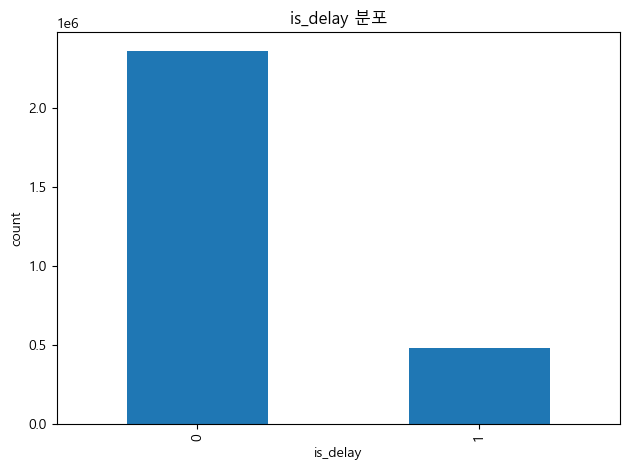


✈️ flight_type(국내/국제) 분포(표)


,count
국내,1577185
국제,1266758


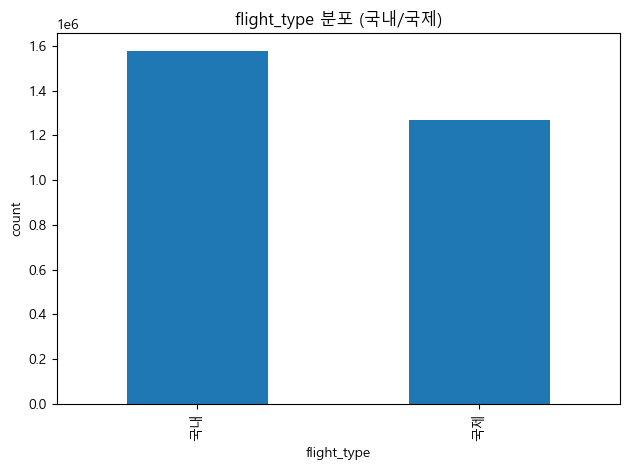


ℹ️ 날짜 컬럼을 찾지 못해 월별 트렌드 그래프는 생략합니다.

📈 수치형 컬럼 히스토그램 대상(분산 상위)


,top_numeric_cols
0,Unnamed: 0
1,일자
2,출발시간
3,계획시간
4,예상시간
5,지연_분


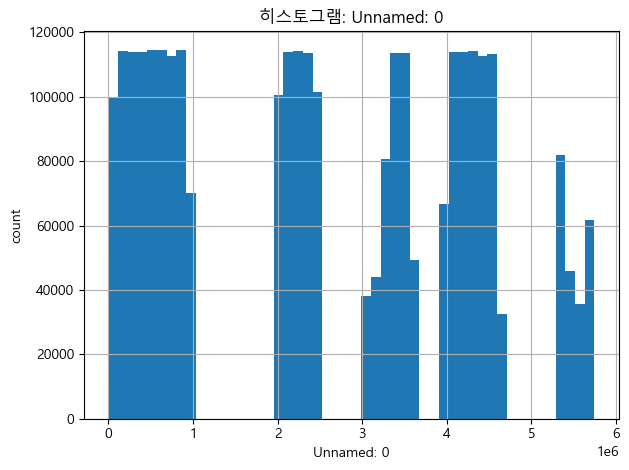

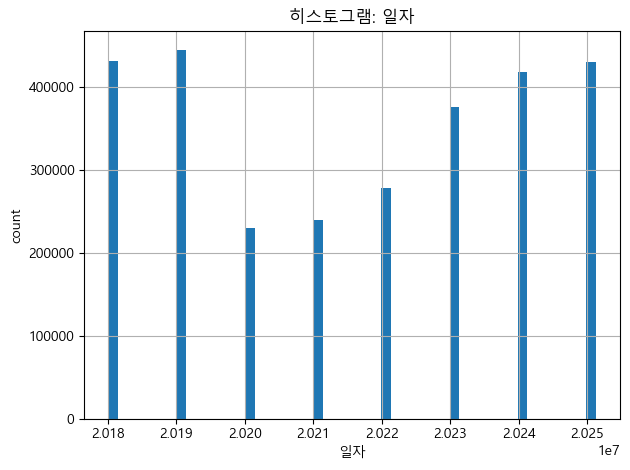

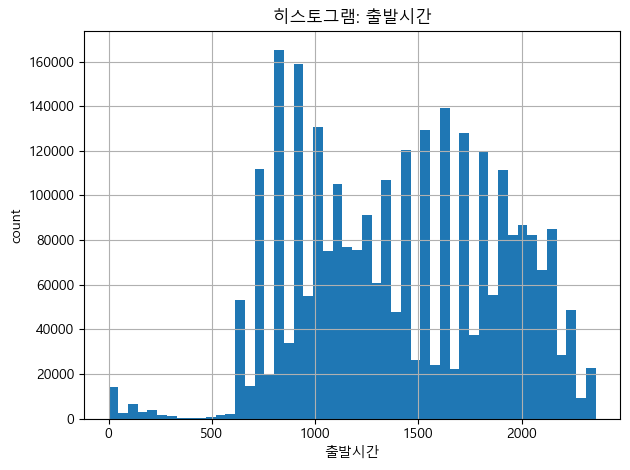

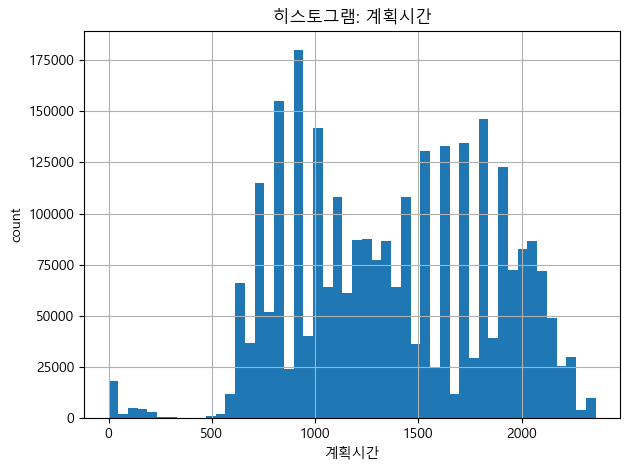

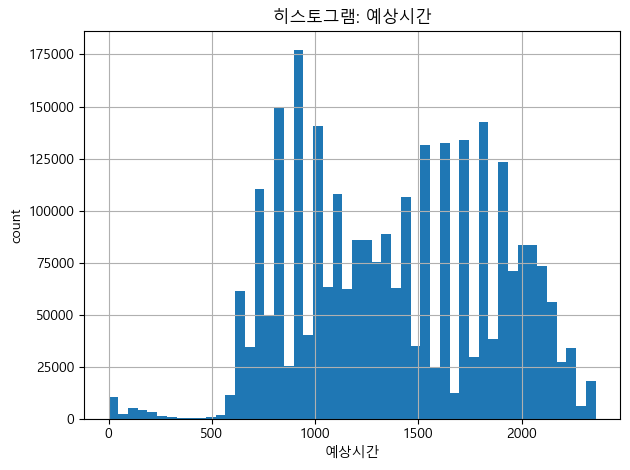

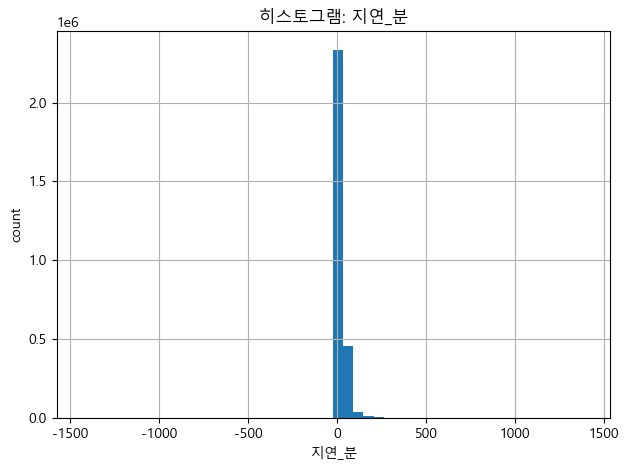


🧠 상관관계 표(상위 분산 수치형 컬럼 기준)


,Unnamed: 0,일자,출발시간,계획시간,예상시간,지연_분,dep_hour,dep_weekday,is_weekend,도착시간
Unnamed: 0,1.000,0.038,0.040,0.054,0.040,-0.152,0.040,-0.001,0.002,NaN
일자,0.038,1.000,0.001,-0.004,-0.004,0.053,0.001,-0.002,-0.001,NaN
출발시간,0.040,0.001,1.000,0.995,0.968,0.137,0.999,0.008,0.004,NaN
계획시간,0.054,-0.004,0.995,1.000,0.968,0.047,0.994,0.008,0.005,NaN
예상시간,0.040,-0.004,0.968,0.968,1.000,0.098,0.967,0.009,0.005,NaN
지연_분,-0.152,0.053,0.137,0.047,0.098,1.000,0.136,0.002,-0.012,NaN
dep_hour,0.040,0.001,0.999,0.994,0.967,0.136,1.000,0.008,0.004,NaN
dep_weekday,-0.001,-0.002,0.008,0.008,0.009,0.002,0.008,1.000,0.791,NaN
is_weekend,0.002,-0.001,0.004,0.005,0.005,-0.012,0.004,0.791,1.000,NaN
도착시간,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


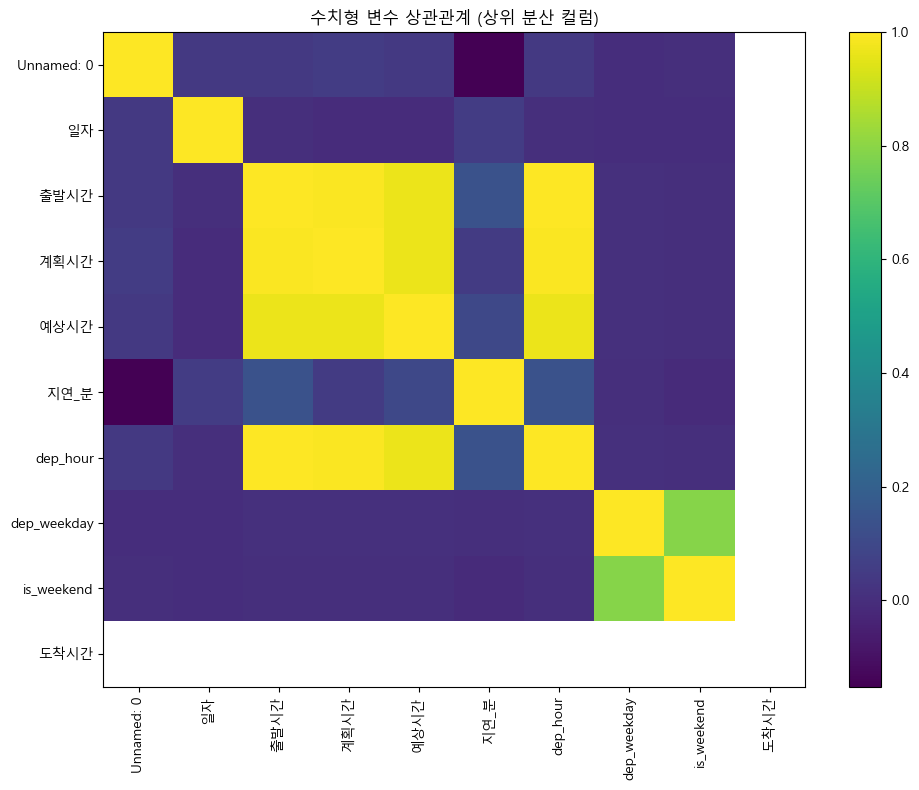


🏷️ 범주형 컬럼 분포 그래프 대상(최대 3개)


,col,nunique(dropna=False)
0,출발/도착,1
1,구분,2
2,flight_type,2



🔤 '출발/도착' 상위 값 Top20(표)


,출발/도착,count
0,출발,2843943


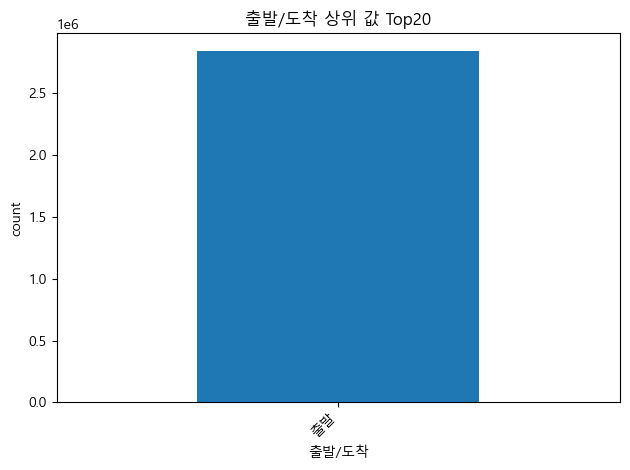


🔤 '구분' 상위 값 Top20(표)


,구분,count
0,여객,2836644
1,기타,7299


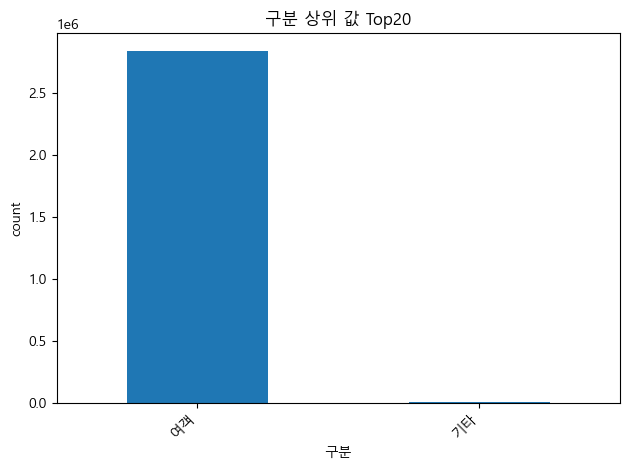


🔤 'flight_type' 상위 값 Top20(표)


,flight_type,count
0,국내,1577185
1,국제,1266758


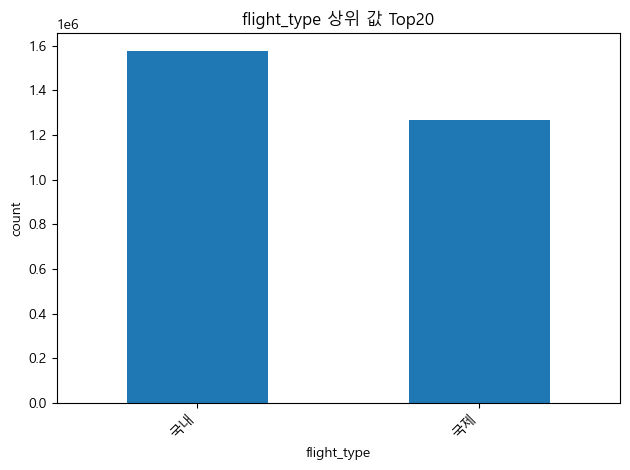


✅ 시각화용 표/그래프 생성 완료


In [20]:
# =========================
# 📊 시각화용 표 / 그래프 (추가)
# =========================
# ✅ 목적
#   - 전처리 결과(df_filtered 등)를 "눈으로" 빠르게 점검하기 위한 셀입니다.
#   - 기존 전처리 로직은 건드리지 않았고, 아래 셀은 시각화(표/그래프)만 담당합니다.
#   - 실행 순서: 전처리 셀들을 모두 실행한 뒤, 마지막에 이 셀을 실행하면 됩니다.
#
# ✅ 주요 기능
#   1) 데이터 개요(행/열, 중복행, dtype 요약) 표 출력
#   2) 결측치(NA) 요약 표 출력
#   3) 타겟/파생 변수 분포(예: is_delay, flight_type) 막대그래프
#   4) 날짜 컬럼이 있으면 월별 건수 트렌드 라인그래프
#   5) 수치형 컬럼 히스토그램(분산 상위) + 상관관계 히트맵
#   6) 범주형(문자열) 컬럼 상위 값 분포 막대그래프
#
# ⚠️ 참고
#   - seaborn은 쓰지 않고 matplotlib 기본만 사용합니다.
#   - 그래프는 "한 그림에 하나" 원칙으로(=subplots X) 생성합니다.
#   - 컬럼명이 노트북마다 다를 수 있어, DataFrame을 자동으로 찾아서 사용합니다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# ---------------------------------------------------------
# 0) 시각화 대상 DataFrame 자동 선택
# ---------------------------------------------------------
# 전처리 노트북에서 흔히 사용하는 DataFrame 변수명을 우선순위로 잡습니다.
# (여기선 전처리 결과가 df_filtered에 담겨 있을 확률이 높아서 1순위로 둡니다.)
preferred_df_names = [
    "df_filtered",   # 이 노트북에서 실제로 사용 중
    "df_sample",     # 샘플링 데이터(있다면)
    "df",            # 범용 이름
    "train_df",
    "data",
]

_df = None
_df_name = None

for name in preferred_df_names:
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        _df = globals()[name]
        _df_name = name
        break

# 위 우선순위 목록에서 못 찾으면, 전역 변수 중 "첫 번째 DataFrame"을 찾아 사용합니다.
if _df is None:
    for k, v in globals().items():
        if isinstance(v, pd.DataFrame):
            _df = v
            _df_name = k
            break

if _df is None:
    raise RuntimeError(
        "시각화할 DataFrame을 찾지 못했습니다. "
        "전처리 셀 실행 후 df_filtered(또는 df) 등이 생성된 상태에서 다시 실행해 주세요."
    )

print(f"✅ 시각화 대상 DataFrame 선택: {_df_name} (shape={_df.shape})")

# ---------------------------------------------------------
# 1) 데이터 개요(요약 표)
# ---------------------------------------------------------
# - 행/열 크기, 중복행 개수, dtype 분포 등을 한 번에 확인합니다.
rows, cols = _df.shape
dup_rows = int(_df.duplicated().sum())

overview = pd.DataFrame({
    "항목": ["행 수", "열 수", "중복 행 수", "중복 행 비율(%)"],
    "값": [rows, cols, dup_rows, round((dup_rows / rows) * 100, 4) if rows > 0 else np.nan]
})
display(overview)

print("\n🔎 상위 10행 미리보기")
display(_df.head(10))

# dtype 요약: 어떤 타입 컬럼이 얼마나 있는지 확인
dtype_summary = (
    _df.dtypes.astype(str)
    .value_counts()
    .rename_axis("dtype")
    .reset_index(name="count")
)
print("\n🧾 dtype 요약")
display(dtype_summary)

# ---------------------------------------------------------
# 2) 결측치(NA) 요약 표
# ---------------------------------------------------------
# - 어떤 컬럼에 결측치가 많은지 상위 30개만 뽑아 확인합니다.
na_cnt = _df.isna().sum()
na_pct = (na_cnt / len(_df) * 100) if len(_df) > 0 else na_cnt * np.nan

na_table = (
    pd.DataFrame({"na_count": na_cnt, "na_pct(%)": na_pct})
    .sort_values(["na_count", "na_pct(%)"], ascending=False)
)
print("\n🧩 결측치 요약 (상위 30개 컬럼)")
display(na_table.head(30))

# ---------------------------------------------------------
# 3) 타겟/파생 변수 분포 그래프
# ---------------------------------------------------------
# (1) is_delay 분포: 지연(1) vs 정상(0)
if "is_delay" in _df.columns:
    vc = _df["is_delay"].value_counts(dropna=False).sort_index()
    print("\n⏱ is_delay 분포(표)")
    display(vc.to_frame("count"))

    plt.figure()
    vc.plot(kind="bar")
    plt.title("is_delay 분포")
    plt.xlabel("is_delay")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()
else:
    print("\nℹ️ 'is_delay' 컬럼이 없어 is_delay 분포 그래프는 생략합니다.")

# (2) flight_type 분포: 국내/국제 (전처리에서 생성한 컬럼)
if "flight_type" in _df.columns:
    vc = _df["flight_type"].value_counts(dropna=False)
    print("\n✈️ flight_type(국내/국제) 분포(표)")
    display(vc.to_frame("count"))

    plt.figure()
    vc.plot(kind="bar")
    plt.title("flight_type 분포 (국내/국제)")
    plt.xlabel("flight_type")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()
else:
    print("\nℹ️ 'flight_type' 컬럼이 없어 국내/국제 분포 그래프는 생략합니다.")

# ---------------------------------------------------------
# 4) 날짜 컬럼이 있으면 월별 건수 트렌드
# ---------------------------------------------------------
# 날짜 컬럼 후보(노트북/데이터에 따라 이름이 다를 수 있어 여러 개를 체크)
date_col_candidates = ["flight_date", "FLIGHT_DATE", "date", "DATE", "출발일", "운항일"]

date_col = None
for c in date_col_candidates:
    if c in _df.columns:
        date_col = c
        break

if date_col is not None:
    # 문자열/정수로 들어온 날짜를 datetime으로 안전하게 변환합니다.
    # - FLIGHT_DATE가 20250122 같은 yyyymmdd 포맷일 수 있으니 format도 함께 시도
    s = _df[date_col]

    dt = None
    if np.issubdtype(s.dtype, np.datetime64):
        dt = pd.to_datetime(s, errors="coerce")
    else:
        # 1차: 일반 파싱
        dt = pd.to_datetime(s, errors="coerce")
        # 2차: yyyymmdd 형태가 많으면 그 포맷으로 재시도
        if dt.isna().mean() > 0.5:  # 절반 이상이 NaT면 포맷 재시도
            dt = pd.to_datetime(s, errors="coerce", format="%Y%m%d")

    tmp = _df.copy()
    tmp["_date_for_plot"] = dt
    tmp = tmp.dropna(subset=["_date_for_plot"])

    if len(tmp) > 0:
        monthly = tmp["_date_for_plot"].dt.to_period("M").value_counts().sort_index()
        monthly.index = monthly.index.astype(str)  # x축 라벨 보기 좋게

        print(f"\n📅 월별 건수 트렌드 (기준 컬럼: {date_col})")
        display(monthly.to_frame("count"))

        plt.figure(figsize=(10, 4))
        monthly.plot(kind="line")
        plt.title(f"월별 항공편 수 트렌드 (based on {date_col})")
        plt.xlabel("월(YYYY-MM)")
        plt.ylabel("count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nℹ️ 날짜 컬럼 '{date_col}' 파싱 결과가 전부 NaT라서 월별 트렌드를 생략합니다.")
else:
    print("\nℹ️ 날짜 컬럼을 찾지 못해 월별 트렌드 그래프는 생략합니다.")

# ---------------------------------------------------------
# 5) 수치형 컬럼 히스토그램 (분산 상위 컬럼 몇 개)
# ---------------------------------------------------------
# 수치형 컬럼을 찾아서, 값 변화가 큰(분산이 큰) 컬럼 위주로 분포를 확인합니다.
num_cols = _df.select_dtypes(include=[np.number]).columns.tolist()

# 분포 확인에서 타겟 변수는 제외(원하면 아래 exclude에서 제거하면 됨)
exclude_num = {"is_delay"}
num_cols = [c for c in num_cols if c not in exclude_num]

if len(num_cols) > 0:
    variances = _df[num_cols].var(numeric_only=True).sort_values(ascending=False)
    top_k = min(6, len(variances))  # 너무 많으면 보기 힘드니 최대 6개만
    top_num_cols = variances.head(top_k).index.tolist()

    print("\n📈 수치형 컬럼 히스토그램 대상(분산 상위)")
    display(pd.DataFrame({"top_numeric_cols": top_num_cols}))

    for col in top_num_cols:
        # NaN 제거 후 히스토그램
        plt.figure()
        _df[col].dropna().hist(bins=50)
        plt.title(f"히스토그램: {col}")
        plt.xlabel(col)
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()
else:
    print("\nℹ️ 수치형 컬럼이 없어 히스토그램은 생략합니다.")

# ---------------------------------------------------------
# 6) 상관관계 히트맵(수치형, 분산 상위 최대 20개)
# ---------------------------------------------------------
if len(num_cols) >= 2:
    variances = _df[num_cols].var(numeric_only=True).sort_values(ascending=False)
    top_n = min(20, len(variances))
    corr_cols = variances.head(top_n).index.tolist()

    corr = _df[corr_cols].corr(numeric_only=True)

    print("\n🧠 상관관계 표(상위 분산 수치형 컬럼 기준)")
    display(corr.round(3))

    # 히트맵(색상 지정 없이 matplotlib 기본 사용)
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
    plt.yticks(range(len(corr_cols)), corr_cols)
    plt.title("수치형 변수 상관관계 (상위 분산 컬럼)")
    plt.tight_layout()
    plt.show()
else:
    print("\nℹ️ 상관관계를 계산할 수치형 컬럼이 부족해 히트맵은 생략합니다.")

# ---------------------------------------------------------
# 7) 범주형 컬럼 상위 값 분포 (최대 3개 컬럼)
# ---------------------------------------------------------
# 문자열/카테고리 컬럼 중에서 "고유값 개수가 작은" 컬럼을 우선으로 뽑아 분포를 봅니다.
cat_cols = _df.select_dtypes(include=["object", "category"]).columns.tolist()

if len(cat_cols) > 0:
    # 고유값 개수 기준 정렬(작은 컬럼이 시각화에 더 적합)
    nunique_map = {c: int(_df[c].nunique(dropna=False)) for c in cat_cols}
    sorted_cat = sorted(cat_cols, key=lambda c: nunique_map[c])

    # 너무 고유값이 큰 컬럼은 막대그래프가 난잡해지니 제외(기본 50 이하만)
    picked = [c for c in sorted_cat if nunique_map[c] <= 50][:3]

    if len(picked) == 0:
        print("\nℹ️ 범주형 컬럼은 있지만 고유값이 너무 많아(>50) 막대그래프는 생략합니다.")
    else:
        print("\n🏷️ 범주형 컬럼 분포 그래프 대상(최대 3개)")
        display(pd.DataFrame({
            "col": picked,
            "nunique(dropna=False)": [nunique_map[c] for c in picked]
        }))

        for col in picked:
            vc = _df[col].fillna("(NaN)").value_counts().head(20)  # 상위 20개만
            print(f"\n🔤 '{col}' 상위 값 Top20(표)")
            display(vc.to_frame("count").rename_axis(col).reset_index())

            plt.figure()
            vc.plot(kind="bar")
            plt.title(f"{col} 상위 값 Top20")
            plt.xlabel(col)
            plt.ylabel("count")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()
else:
    print("\nℹ️ 범주형(object/category) 컬럼이 없어 분포 그래프는 생략합니다.")

executed in 11.8s, finished 17:10:49 2026-01-22
print("\n✅ 시각화용 표/그래프 생성 완료")